# Distribución Normal Estandard
###### https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_norm.html
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html#scipy.stats.truncnorm


In [135]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

The probability density is defined in the “standardized” form. 
+ To shift and/or scale the distribution use the loc and scale parameters. 
+ Specifically, norm.pdf(x, loc, scale) is identically equivalent to norm.pdf(y) / scale 
    + with y = (x - loc) / scale. 
+ Note that shifting the location of a distribution does not make it a “noncentral” distribution; noncentral generalizations of some distributions are available in separate classes.

Calculo de los estadisticos (4 momentos) de la versión normal estandard
+ En su versión estandard la distribución normal tiene:
    + µ = 0
    + 𝞂2 = 1
    + sesgo = 0
    + kurtosis = 0

In [136]:
# Estadísticos de la distribución uniforme como aparecen en su forma estandard
mean, var, skew, kurt = norm.stats(moments='mvsk')
mean, var, skew, kurt

(0.0, 1.0, 0.0, 0.0)

### Creación de una función de distribución estandard
Se puede crear la forma estandard de la distribución con Scipy
+ 1. primero se crean los valores de x, con ppf
    + ppf define los percentiles sobre x (por ejemplo 100)
+ 2. Luego se generan los valores de la función (y o f(x)) con el método pdf

In [137]:
# Creación de los valores de x o percentiles
# Como la distribución es normal distribuye los valores desde negativos hasta positivos
#   con media en cero
# x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
x = np.linspace(-4, +4, 1000)

# Creacion de los valores de y o f(x)
# Se obtienen con el método pdf. Una forma es directamente: norm.pdf(x)
y = norm.pdf(x) # norm.pdf genera una nueva distribución normal cada vez que se la llama. y en cambio es una instancia que no varía más.

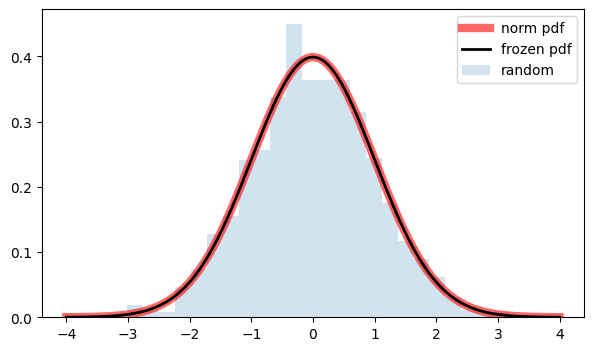

In [138]:
# Visualización con matplotlib.pyplot
# Genero la plantilla del grafico
fig, ax = plt.subplots(1, 1, figsize = (7,4))

# Dibujo la distribución normal
ax.plot(x, norm.pdf(x), 'r-', lw=6, alpha=0.6, label='norm pdf')

# Como alternativa, se puede llamar al objeto de distribución (como función) para fijar los parámetros de forma, ubicación y escala. 
# Esto devuelve un objeto RV “congelado” que mantiene fijos los parámetros dados.
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Generación de números aleatorios con distribución normal para ver si ajustan a la curva de distribución normal creada
r = norm.rvs(size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='random')

# Activar las leyendas
ax.legend()

plt.show()

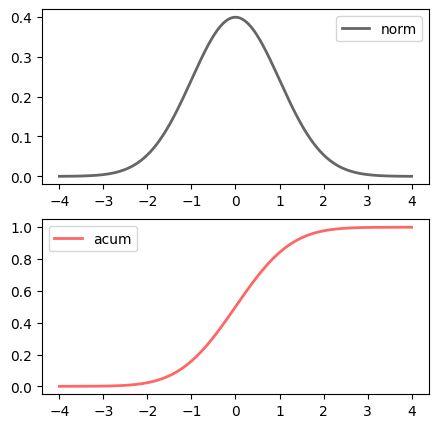

In [139]:
# Distribución Acumulada
# Genero la plantilla del grafico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5,5))

# Dibujo la distribución normal
ax1.plot(x, norm.pdf(x), 'k-', lw=2, alpha=0.6, label='norm')
ax2.plot(x, norm.cdf(x), 'r-', lw=2, alpha=0.6, label='acum')

# Activar las leyendas
ax1.legend()
ax2.legend()

plt.show()

Como es fácil de suponer, el área bajo la curva de una districución estandard es igual a 1

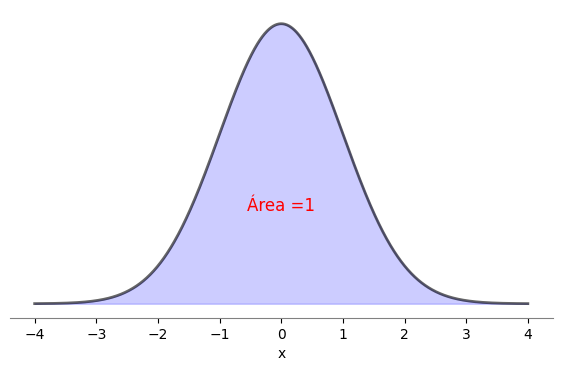

In [140]:
# Visualización del área bajo la curva
# Genero la plantilla del grafico
fig, ax = plt.subplots(1, 1, figsize = (7,4))

# Dibujo la distribución normal
ax.plot(x, norm.pdf(x), 'k-', lw=2, alpha=0.6, label='norm pdf')
# Sombreado del área bajo la curva
ax.fill_between(x, 0, norm.pdf(x), color='blue', alpha=0.2, label='Área bajo la curva')

# Añadir texto en el centro del gráfico
x_centro = (x.max() + x.min()) / 2  # Punto medio del eje X
y_centro = 0.14  # Valor arbitrario en el eje Y (cerca del centro de la distribución)
ax.text(x_centro, y_centro, f"Área =1",  # Texto con formato
        ha='center', va='center', fontsize=12, color='red')  # Alineación y estilo

# Personalización del gráfico
# ax.set_title('Distribución Normal Estandard')
ax.set_xlabel('x')
# ax.set_ylabel('Densidad de probabilidad')
# ax.legend()
# plt.grid(True)

ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')

plt.show()


#### Creación de la distribución normal a partir de la fórmula
Una distribución normal se puede crear a partir de su formula matemática en lugar de usar Scipy

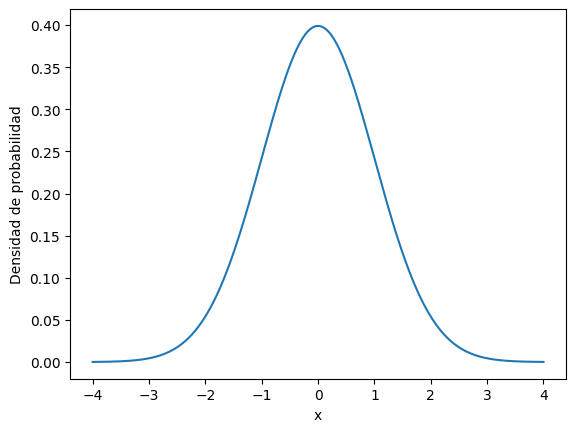

In [141]:
# Creación de una distribución normal a partir de su formula
media = 0
desviacion_estandar = 1

limite_inferior = media - 4 * desviacion_estandar
limite_superior = media + 4 * desviacion_estandar
num_puntos = 1000

x = np.linspace(limite_inferior, limite_superior, num_puntos)
pdf_normal = (1 / (desviacion_estandar * np.sqrt(2 * np.pi))) * np.exp(-((x - media) ** 2) / (2 * desviacion_estandar ** 2))

fig, ax = plt.subplots()
ax.plot(x, pdf_normal)
# ax.set_title('Distribución normal')
ax.set_xlabel('x')
ax.set_ylabel('Densidad de probabilidad')
# plt.grid(True)
plt.show()


### Cambio de la distribución normal en funcón de los estadísticos de media y desvío estandard

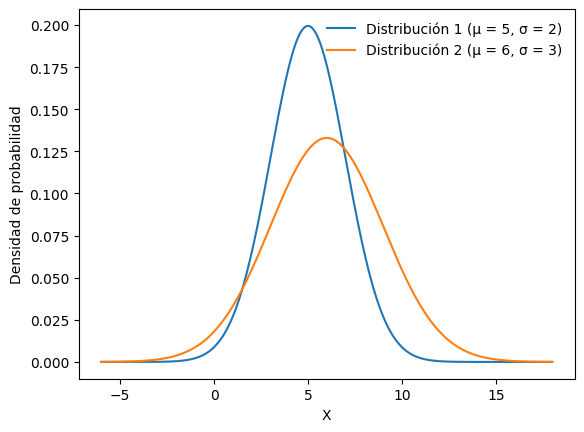

In [144]:
# Variación de la curva en funcón de la media y la  desviación estandard
# Calculos a partir de la formula

# Distribución 1: media = 5, desviación estándar = 2
media1 = 5
desviacion_estandar1 = 2

# Distribución 2: media = 6, desviación estándar = 3
media2 = 6
desviacion_estandar2 = 3

# Generar vectores de datos
limite_inferior = min(media1 - 4 * desviacion_estandar1, media2 - 4 * desviacion_estandar2)
limite_superior = max(media1 + 4 * desviacion_estandar1, media2 + 4 * desviacion_estandar2)
num_puntos = 1000

x = np.linspace(limite_inferior, limite_superior, num_puntos)

# Calcular funciones de densidad de probabilidad
pdf_normal1 = (1 / (desviacion_estandar1 * np.sqrt(2 * np.pi))) * np.exp(-((x - media1) ** 2) / (2 * desviacion_estandar1 ** 2))
pdf_normal2 = (1 / (desviacion_estandar2 * np.sqrt(2 * np.pi))) * np.exp(-((x - media2) ** 2) / (2 * desviacion_estandar2 ** 2))

# Dibujar curvas
fig, ax = plt.subplots()
ax.plot(x, pdf_normal1, label=f'Distribución 1 (μ = {media1}, σ = {desviacion_estandar1})')
ax.plot(x, pdf_normal2, label=f'Distribución 2 (μ = {media2}, σ = {desviacion_estandar2})')

# Personalizar el gráfico
# ax.set_title('Distribuciones normales superpuestas')
ax.set_xlabel('X')
ax.set_ylabel('Densidad de probabilidad')
ax.legend(frameon=False)
# plt.grid(True)
plt.show()


En definitiva:
1. Cuanto mayor es la media, la curva se ubica más hacia la derecha de la estandard. Y viceversa.
2. Cuanto mayor es el desvío estandard la curva se hace más baja y ancha. Y Viceversa.

#### Ejemplo: Distribuciones normales estaturas de mujeres y hombres
+ La media de las mujeres es menor (son mas bajas en promedio)
    + por eso la curva esta a la izquierda de la de los hombres que son más altos en promedio.
+ El desvío estandard de los hombres es mayor
    + por eso la curva de los hombres se ensancha y se hace más baja que la de las mujeres.

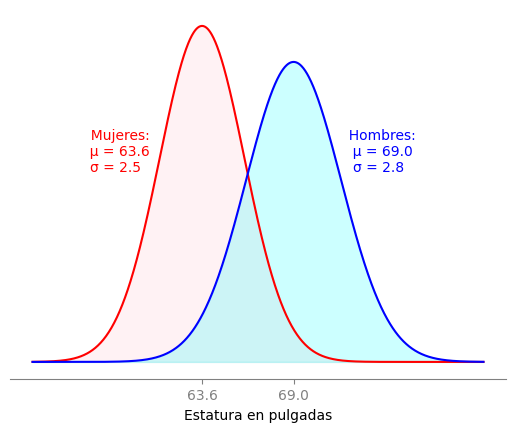

In [146]:
# Distribución de las estaturas de hombres y mujeres
media1 = 63.6
desviacion_estandar1 = 2.5

# Distribución 2: media = 6, desviación estándar = 3
media2 = 69.0
desviacion_estandar2 = 2.8

# Generar vectores de datos
limite_inferior = min(media1 - 4 * desviacion_estandar1, media2 - 4 * desviacion_estandar2)
limite_superior = max(media1 + 4 * desviacion_estandar1, media2 + 4 * desviacion_estandar2)
num_puntos = 1000

x = np.linspace(limite_inferior, limite_superior, num_puntos)

# Calcular funciones de densidad de probabilidad
norm1 = norm(loc=media1, scale=desviacion_estandar1)
norm2 = norm(loc=media2, scale=desviacion_estandar2)
pdf_normal1 = norm1.pdf(x)
pdf_normal2 = norm2.pdf(x)

# Dibujar curvas
fig, ax = plt.subplots()
ax.plot(x, pdf_normal1, 'r')
ax.plot(x, pdf_normal2, 'b')

ax.fill_between(x, 0, pdf_normal1, color='pink', alpha=0.2)
ax.fill_between(x, 0, pdf_normal2, color='cyan', alpha=0.2)

# Personalizar el gráfico
ax.text(74, 0.10, f"  Hombres:\n  μ = {media2}\nσ = {desviacion_estandar2}", ha='center', va='center', fontsize=10, color='b')
ax.text(58.5, 0.10, f"  Mujeres:\n  μ = {media1}\nσ = {desviacion_estandar1}", ha='center', va='center', fontsize=10, color='r')

ax.set_xticks([63.6,69])
ax.set_yticks([])

# Establecer color gris para las marcas de graduación del eje X
ax.xaxis.set_tick_params(color='gray')

# Establecer color gris para las etiquetas del eje X
ax.xaxis.set_tick_params(labelcolor='gray')

ax.set_xlabel('Estatura en pulgadas', color='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')

# plt.grid(True)
plt.show()
